In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## Membuat Scatterplot

In [3]:
dataset = sns.load_dataset("mpg")
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


<Axes: xlabel='displacement', ylabel='mpg'>

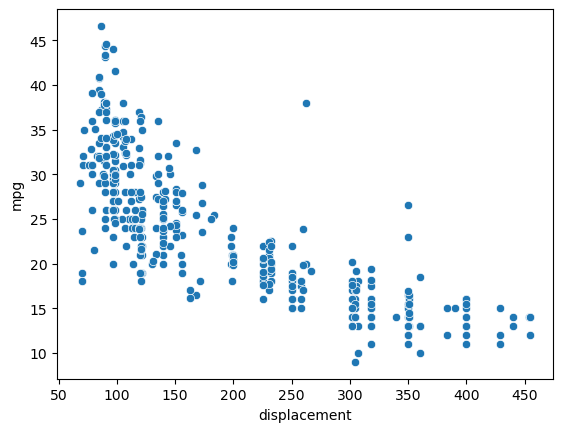

In [5]:
sns.scatterplot(
    data=dataset,
    x="displacement",
    y="mpg",
)

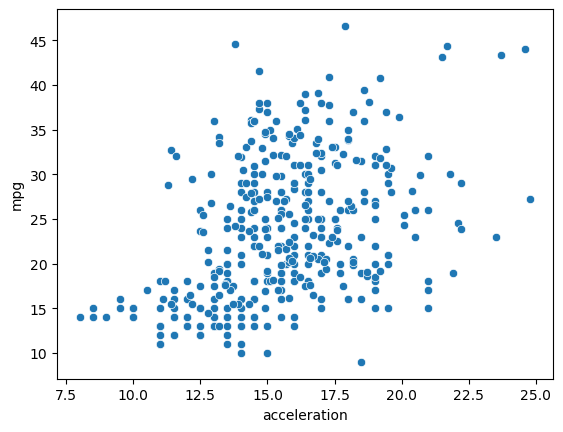

In [6]:
sns.scatterplot(data = dataset,
                x = "acceleration",
                y = "mpg")
plt.show()

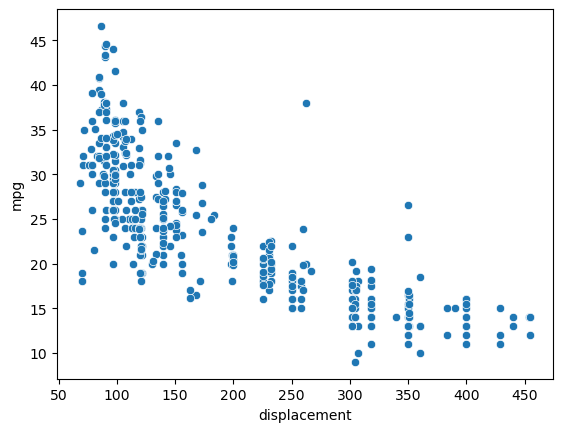

In [7]:
sns.scatterplot(data = dataset,
                x = "displacement",
                y = "mpg")
plt.show()

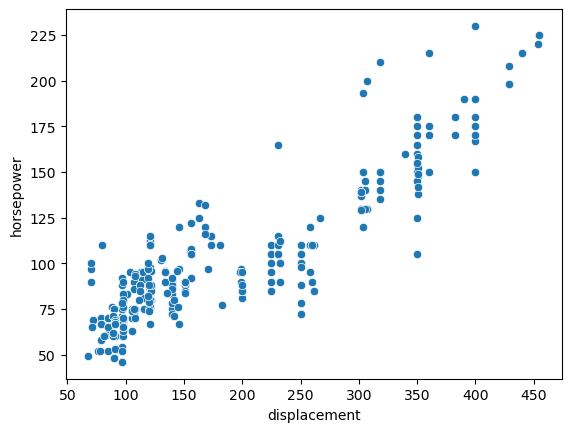

In [8]:
sns.scatterplot(data = dataset,
                x = "displacement",
                y = "horsepower")
plt.show()

## Membuat Korelasi Pearson

In [11]:
korelasi = dataset.select_dtypes(include='number').corr()
korelasi

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


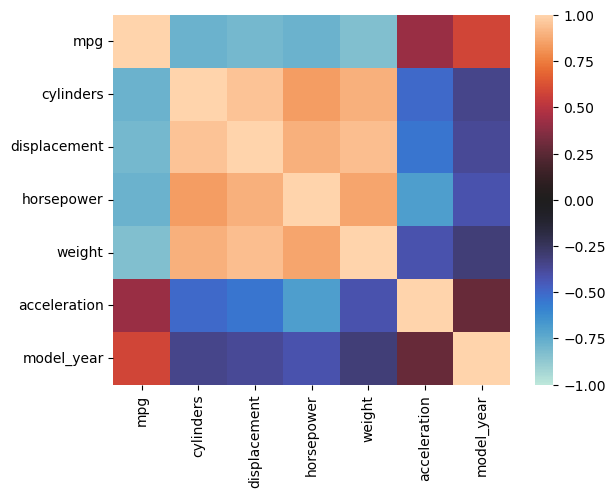

In [12]:
sns.heatmap(
    korelasi,
    vmax=1,
    vmin=-1,
    center=0
)
plt.show()

## Uji Hipotesis

In [13]:
from scipy.stats import pearsonr

coef, p_val = pearsonr(
    dataset["mpg"],
    dataset["displacement"]
)

In [14]:
coef

-0.804202824805898

In [15]:
p_val

1.6558889101929443e-91

# selection features

In [17]:
target_corr = korelasi["mpg"].sort_values(ascending=False)
print(target_corr)

mpg             1.000000
model_year      0.579267
acceleration    0.420289
cylinders      -0.775396
horsepower     -0.778427
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64


In [20]:
threshold = 0.5
high_corr = target_corr[abs(target_corr) > threshold].index
down_corr = target_corr[abs(target_corr) < threshold].index

print("corelation tinggi: ", high_corr)
print("corelation rendah: ", down_corr)

corelation tinggi:  Index(['mpg', 'model_year', 'cylinders', 'horsepower', 'displacement',
       'weight'],
      dtype='object')
corelation rendah:  Index(['acceleration'], dtype='object')


In [22]:
filter_selection_df = dataset[high_corr]
filter_selection_df.head()

,mpg,model_year,cylinders,horsepower,displacement,weight
0,18.0,70,8,130.0,307.0,3504
1,15.0,70,8,165.0,350.0,3693
2,18.0,70,8,150.0,318.0,3436
3,16.0,70,8,150.0,304.0,3433
4,17.0,70,8,140.0,302.0,3449
